In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load The Data

In [2]:
df = pd.read_csv("car data.csv")
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


#### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##### Interquartile Range (IQR)

In [6]:
def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lb = q1 - (1.5 * IQR)
    ub = q3 + (1.5 * IQR)
    return lb, ub

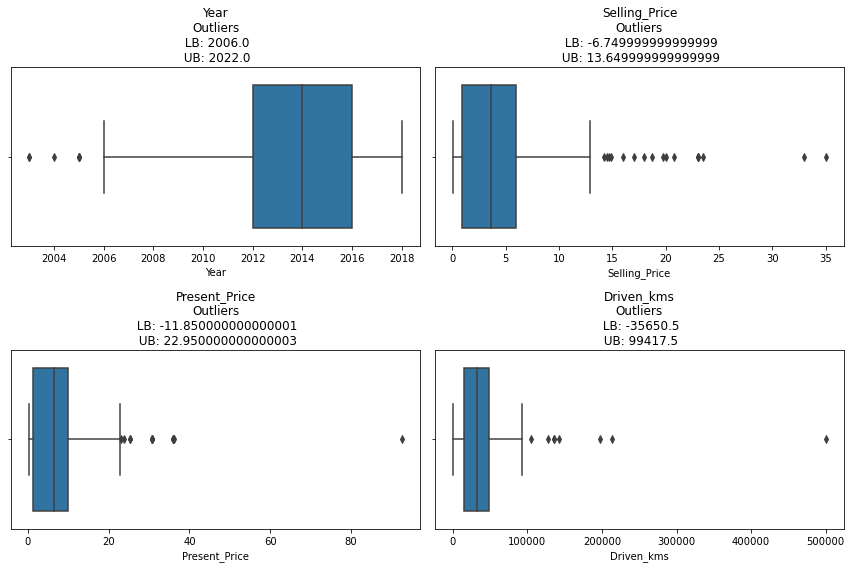

In [7]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
columns = ["Year", "Selling_Price", "Present_Price", "Driven_kms"]

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.boxplot(ax=ax[row, col], x=df[column])
    lb,ub = find_outliers(df[column])
    ax[row, col].set_title(f"{column}\nOutliers\n LB: {lb}\n UB: {ub}")

plt.tight_layout()
plt.show()

##### Histogram

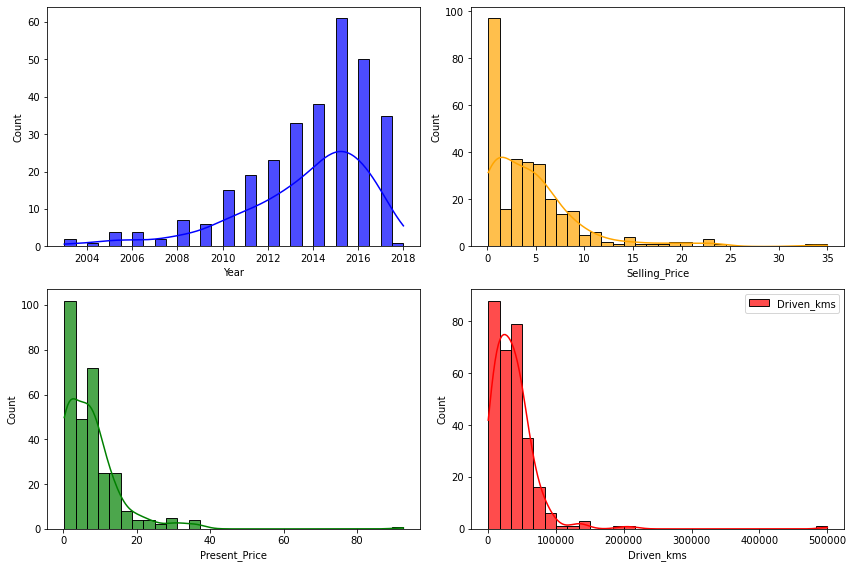

In [8]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
colors = ['blue', 'orange', 'green', 'red']  
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.histplot(ax=ax[row, col], x=df[column],bins=30, kde=True, color=colors[i], label=column, alpha=0.7)

ax[row,col].legend()
plt.tight_layout()
plt.show()

#### Distribution of categorical Data

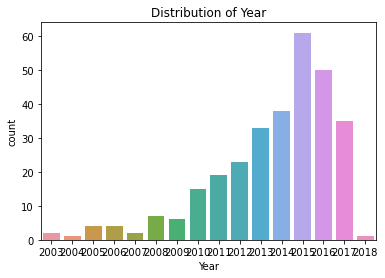

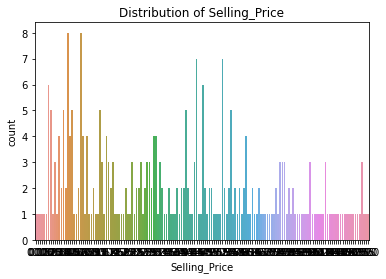

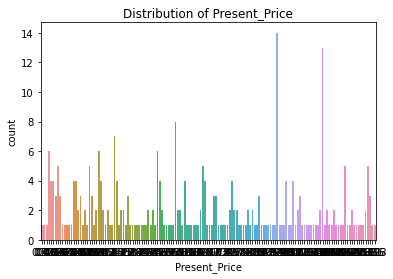

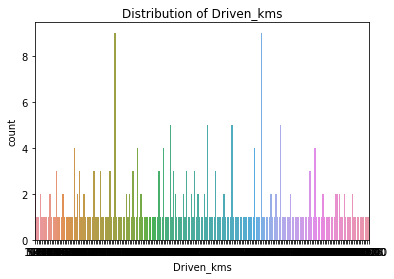

In [9]:
for column in columns:
    plt.figure()  
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()
    
columns = ['Fuel_Type','Selling_type','Transmission']    

In [10]:
for column in columns:
    print(df[column].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


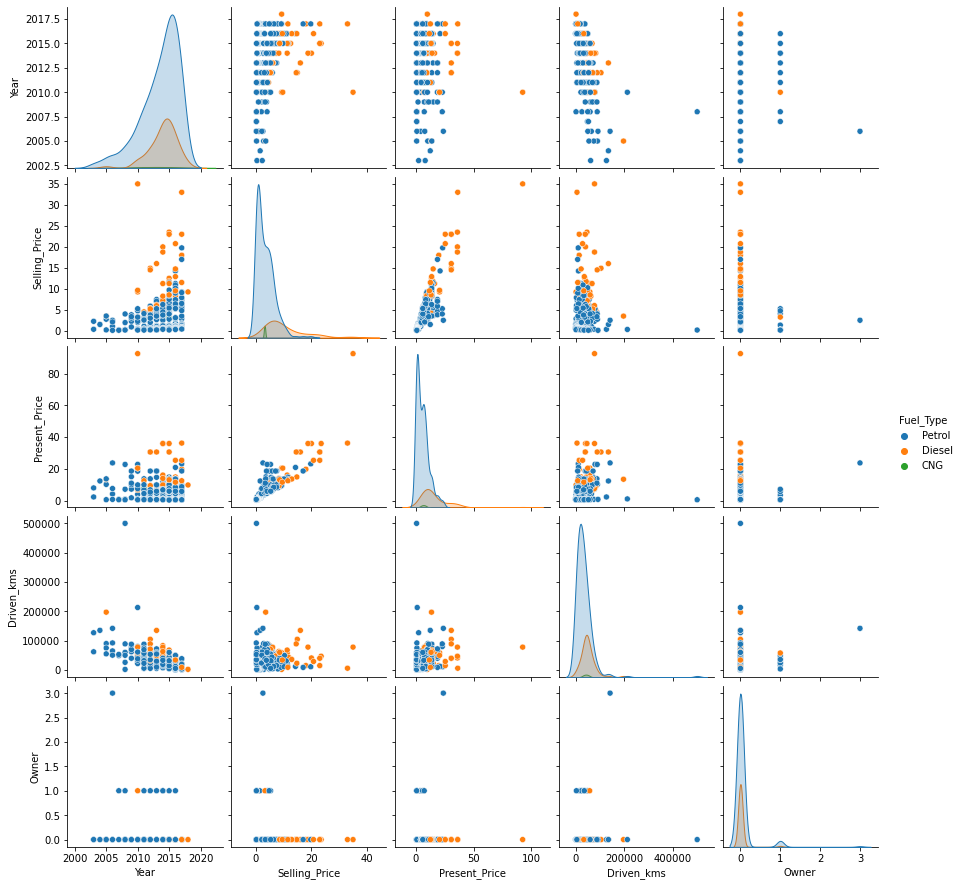

In [11]:
sns.pairplot(df,hue='Fuel_Type');

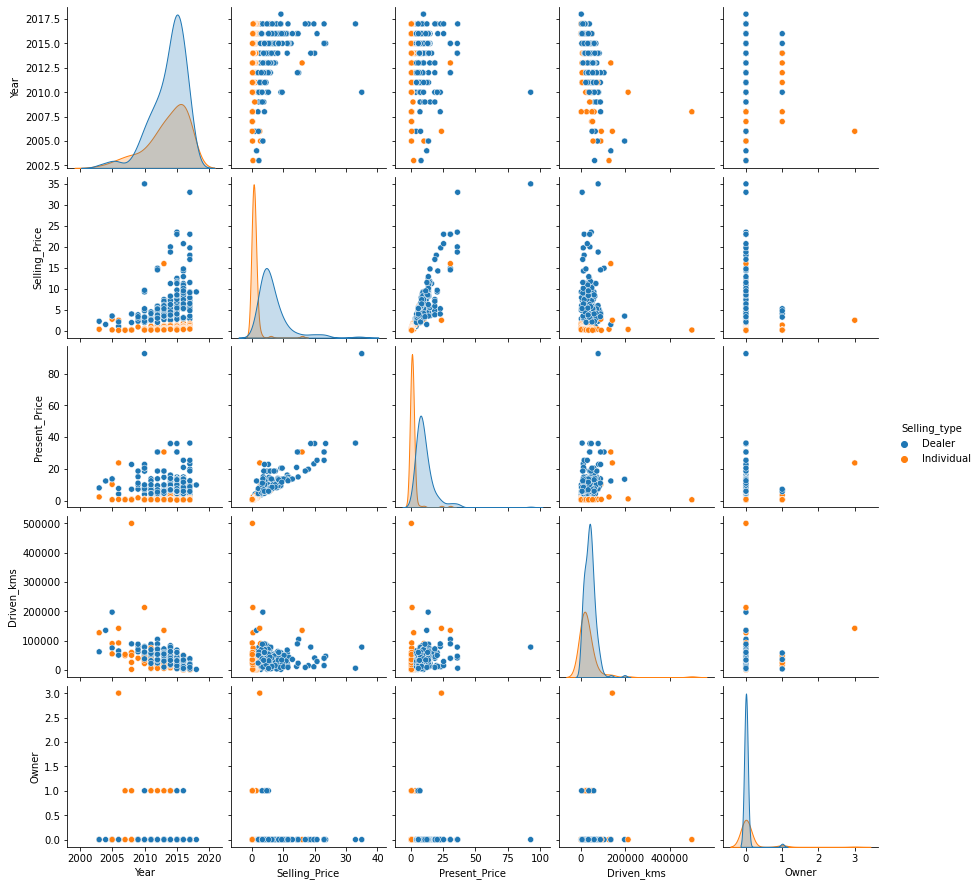

In [12]:
sns.pairplot(df,hue='Selling_type');

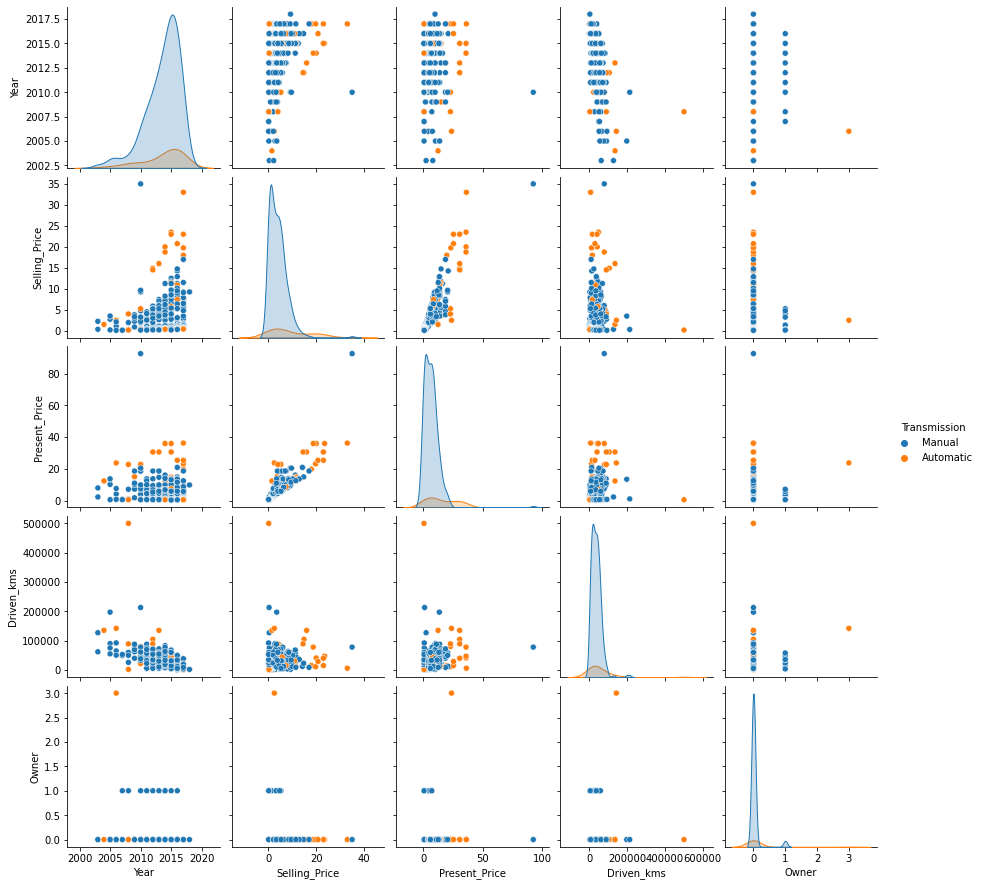

In [13]:
sns.pairplot(df,hue='Transmission');

In [14]:
df.drop('Car_Name',axis=1,inplace=True)

In [15]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Feature Engineering

In [16]:
df.drop_duplicates()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
#### encode categorical columns

df['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)
df['Selling_type'].replace({'Dealer':0,'Individual':1},inplace=True)
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

In [18]:
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())

[0 1 2]
[0 1]
[0 1]


#### Split The Data

In [19]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

#### Training And Testing Data 

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [22]:
### Linear Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

mae1 = mean_absolute_error(y_test,y_pred1)
mse1 = mean_squared_error(y_test,y_pred1)
r2_score1 = r2_score(y_test,y_pred1)*100
print(f"Mean Absolute Error : {mae1}")
print(f"Mean Squared Error : {mse1}")
print(f"R2_score : {r2_score1}")

Mean Absolute Error : 1.2219323621758071
Mean Squared Error : 3.53157988897141
R2_score : 84.66902419662622


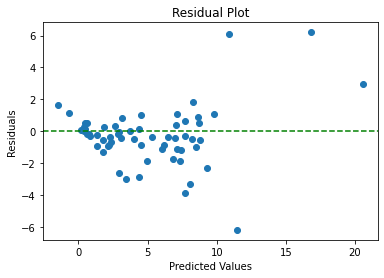

In [23]:
# Residual plot
residuals = y_test - y_pred1
plt.scatter(y_pred1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g', linestyle='--')  
plt.show()


In [24]:
### Decision Tree 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)

mae2 = mean_absolute_error(y_test,y_pred2)
mse2 = mean_squared_error(y_test,y_pred2)
r2_score2 = r2_score(y_test,y_pred2)*100
print(f"Mean Absolute Error : {mae2}")
print(f"Mean Squared Error : {mse2}")
print(f"R2_score : {r2_score2}")

Mean Absolute Error : 0.711639344262295
Mean Squared Error : 1.2617295081967213
R2_score : 94.52269376066684


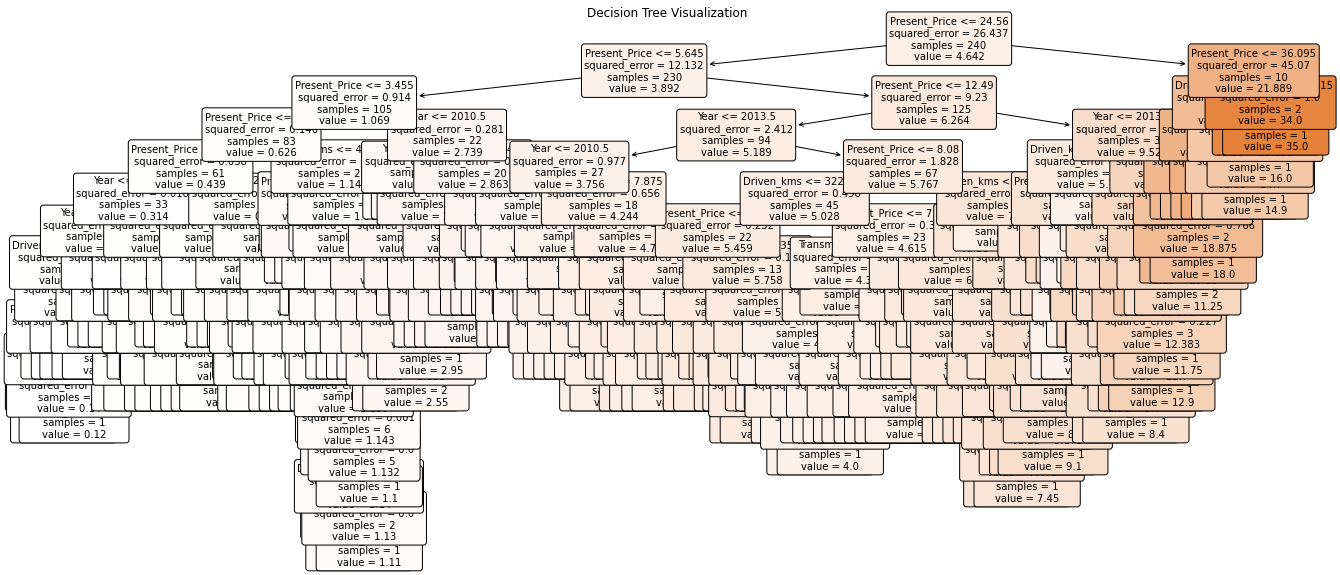

In [25]:
plt.figure(figsize=(22, 10))
plot_tree(dt, feature_names=x_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

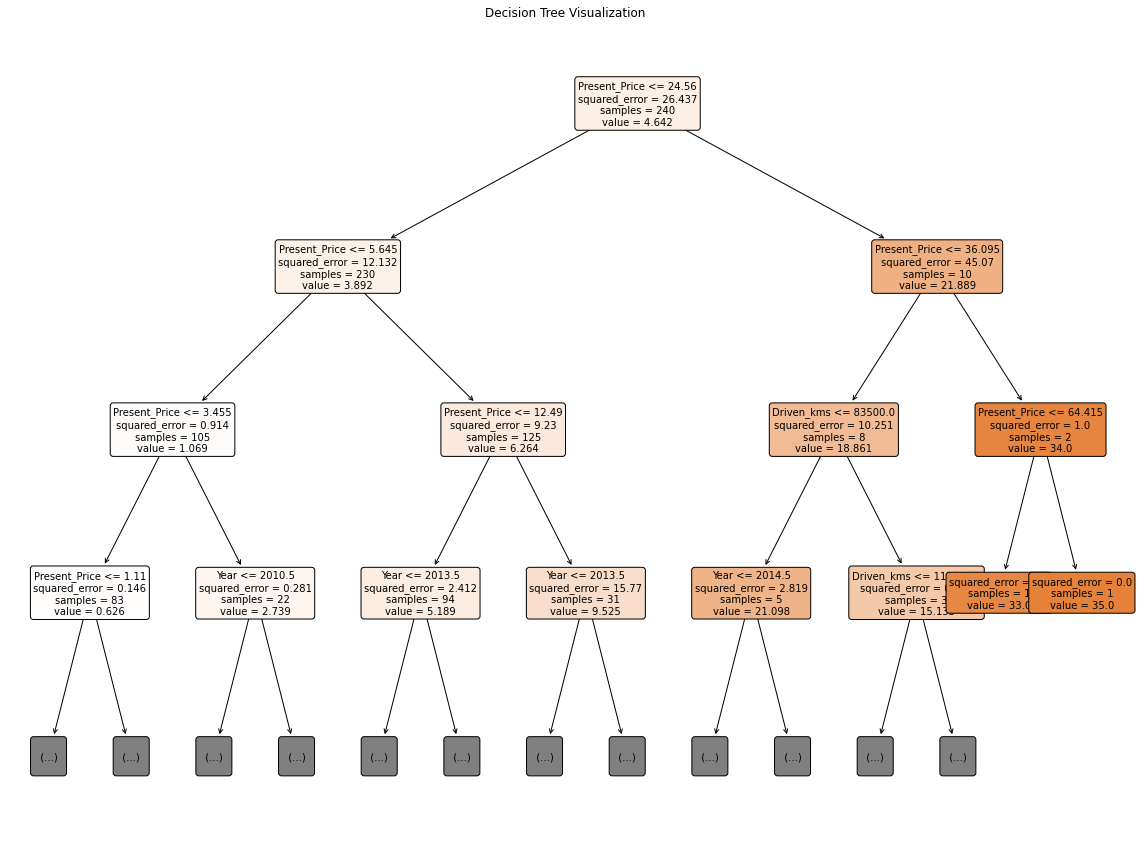

In [26]:
plt.figure(figsize=(20, 15))
plot_tree(dt, feature_names=x_train.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()


In [27]:
#### Support Vector Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svr = make_pipeline(StandardScaler(), SVR())
svr.fit(x_train,y_train)
y_pred3 = svr.predict(x_test)

mae3 = mean_absolute_error(y_test,y_pred3)
mse3 = mean_squared_error(y_test,y_pred3)
r2_score3 = r2_score(y_test,y_pred3)*100
print(f"Mean Absolute Error : {mae3}")
print(f"Mean Squared Error : {mse3}")
print(f"R2_score : {r2_score3}")

Mean Absolute Error : 0.998715552957758
Mean Squared Error : 5.185755854856762
R2_score : 77.48806482297405


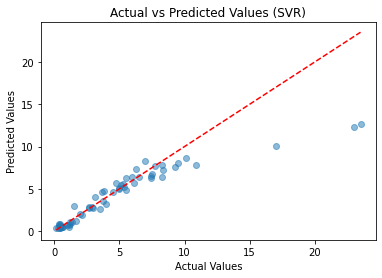

In [28]:
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--')
plt.title('Actual vs Predicted Values (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [29]:
#### RandomForest Regressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)

mae4 = mean_absolute_error(y_test,y_pred4)
mse4 = mean_squared_error(y_test,y_pred4)
r2_score4 = r2_score(y_test,y_pred4)*100
print(f"Mean Absolute Error : {mae4}")
print(f"Mean Squared Error : {mse4}")
print(f"R2_score : {r2_score4}")

Mean Absolute Error : 0.6229639344262295
Mean Squared Error : 0.874058496721311
R2_score : 96.20561615898472


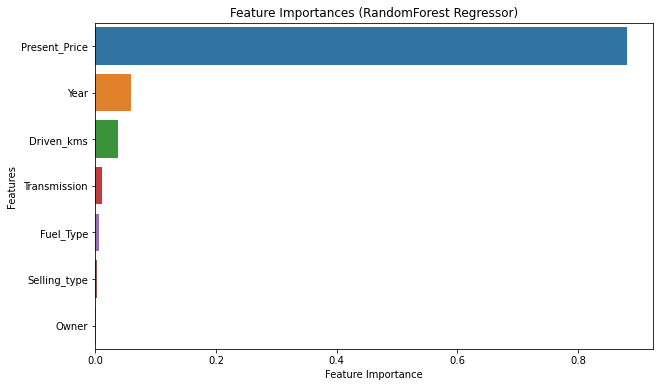

In [30]:
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = x_train.columns[sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=features)
plt.title('Feature Importances (RandomForest Regressor)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred5 = gb.predict(x_test)

mae5 = mean_absolute_error(y_test,y_pred5)
mse5 = mean_squared_error(y_test,y_pred5)
r2_score5 = r2_score(y_test,y_pred5)*100
print(f"Mean Absolute Error : {mae5}")
print(f"Mean Squared Error : {mse5}")
print(f"R2_score : {r2_score5}")

Mean Absolute Error : 0.5673770576154464
Mean Squared Error : 0.8303490002963634
R2_score : 96.39536387902389


In [32]:
models = ['Linear Regression','Decision Tree','Support Vector Regression','RandomForest','GradientBoost']
mae_of_models = [mae1,mae2,mae3,mae4,mae5]
mse_of_models = [mse1,mse2,mse3,mse4,mse5]
r2_values = [r2_score1,r2_score2,r2_score3,r2_score4,r2_score5]

df1 = pd.DataFrame({
    'Model': models,
    'MAE': mae_of_models,
    'MSE': mse_of_models,
    'R2 Score': r2_values
})

df1 = df1.sort_values(by='R2 Score',ascending=False)

df1

,Model,MAE,MSE,R2 Score
4,GradientBoost,0.567377,0.830349,96.395364
3,RandomForest,0.622964,0.874058,96.205616
1,Decision Tree,0.711639,1.261730,94.522694
0,Linear Regression,1.221932,3.531580,84.669024
2,Support Vector Regression,0.998716,5.185756,77.488065


***Gradient Boosting model appears to be the best-performing model among the ones***

In [33]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [37]:
user_input = {}
for feature in x_train.columns:
    user_input[feature] = float(input(f"Enter the value for {feature}: "))

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

predict = gb.predict(user_df)
predict = predict[0]

predict

Enter the value for Year: 2016
Enter the value for Present_Price: 5.90
Enter the value for Driven_kms: 5464
Enter the value for Fuel_Type: 0
Enter the value for Selling_type: 0
Enter the value for Transmission: 0
Enter the value for Owner: 0


5.0329477959913